In this section of code, we will be implementing the Recurrent Neural Network with a nonlinear activation function using optimized using gradient descent and trained at 180 iterations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [139]:
dataset=pd.read_excel('Datasets/Final Data.xlsx',index_col='date')
dataset.drop(['Unnamed: 0','fips','dailynewcases','dailynewdeaths','state','deaths'],axis=1,inplace=True)
dataset.head()

revenue        demand  occupancy  year  month  day  cases
date                                                                      
2013-01-01  2.442363e+06  13063.675000  81.991307  2013      1    1      0
2013-01-02  2.018559e+06  13069.608539  82.028548  2013      1    2      0
2013-01-03  1.927676e+06  13069.608539  82.028548  2013      1    3      0
2013-01-04  1.781664e+06  12653.271887  79.415502  2013      1    4      0
2013-01-05  1.824994e+06  12827.322364  80.507892  2013      1    5      0

# PREPROCESSING THE DATA

In [140]:
'''
Scaling the dataset
'''

scaler = MinMaxScaler()
model=scaler.fit(dataset[['revenue','demand','occupancy','month','day']])
scaled_data=model.transform(dataset[['revenue','demand','occupancy','month','day']])
dataset[['revenue','demand','occupancy','month','day']]=scaled_data

In [141]:
dataset.head()

revenue    demand  occupancy  year  month       day  cases
date                                                                   
2013-01-01  0.252131  0.460923   0.793919  2013    0.0  0.000000      0
2013-01-02  0.194486  0.461239   0.794387  2013    0.0  0.033333      0
2013-01-03  0.182125  0.461239   0.794387  2013    0.0  0.066667      0
2013-01-04  0.162264  0.439074   0.761537  2013    0.0  0.100000      0
2013-01-05  0.168158  0.448340   0.775270  2013    0.0  0.133333      0

In [142]:
'''
Train-test split
'''

train_dataset = dataset[dataset.year != 2019].drop('year',axis=1)
test_dataset = dataset[dataset.year == 2019].drop('year',axis=1)

In [143]:
'''
COnverting the train data into suitable form for the nerual network
'''

window_size = 7
train_dataset_as_np = train_dataset.to_numpy()
X_1 = []
y_1 = []
for i in range(len(train_dataset_as_np)-window_size):
    row = [r for r in train_dataset_as_np[i:i+window_size]]
    X_1.append(row)
    label = train_dataset_as_np[i+window_size][2]
    y_1.append(label)
X_train,y_train=np.array(X_1),np.array(y_1)

In [144]:
X_train.shape,y_train.shape

((2489, 7, 6), (2489,))

In [145]:
'''
COnverting the train data into suitable form for the nerual network
'''

test_dataset_as_np = test_dataset.to_numpy()
X_2 = []
y_2 = []
for i in range(len(test_dataset_as_np)-window_size):
    row = [r for r in test_dataset_as_np[i:i+window_size]]
    X_2.append(row)
    label = test_dataset_as_np[i+window_size][2]
    y_2.append(label)
X_test,y_test=np.array(X_2),np.array(y_2)

In [146]:
X_test.shape,y_test.shape

((358, 7, 6), (358,))

# MODEL CONSTRUCTION

In [159]:
'''
Constructing the RNN-LSTM model with a hidden layer of 400 units
&
two dense layers
&
tanh used a activation function
'''

model = Sequential()
model.add(InputLayer((7, 6)))
model.add(LSTM(400,'tanh'))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'tanh'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 400)               651200    
                                                                 
 dense_24 (Dense)            (None, 8)                 3208      
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 654,417
Trainable params: 654,417
Non-trainable params: 0
_________________________________________________________________


In [165]:
'''
Compiling the model when optimization is done using gradient descent
&
trained at 180 iterations
'''

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [166]:
model.fit(X_train, y_train, epochs=180)

Epoch 1/180
78/78 [==============================] - 4s 31ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443
Epoch 2/180
78/78 [==============================] - 2s 32ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434
Epoch 3/180
78/78 [==============================] - 2s 31ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433
Epoch 4/180
78/78 [==============================] - 2s 31ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431
Epoch 5/180
78/78 [==============================] - 2s 31ms/step - loss: 0.0018 - root_mean_squared_error: 0.0430
Epoch 6/180
78/78 [==============================] - 2s 31ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429
Epoch 7/180
78/78 [==============================] - 3s 32ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428
Epoch 8/180
78/78 [==============================] - 2s 32ms/step - loss: 0.0018 - root_mean_squared_error: 0.0427
Epoch 9/180
78/78 [==============================] - 3s 34ms/step - loss: 0.0018

78/78 [==============================] - 3s 34ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390
Epoch 142/180
78/78 [==============================] - 3s 34ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389
Epoch 143/180
78/78 [==============================] - 3s 34ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388
Epoch 144/180
78/78 [==============================] - 3s 35ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389
Epoch 145/180
78/78 [==============================] - 3s 34ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388
Epoch 146/180
78/78 [==============================] - 3s 34ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387
Epoch 147/180
78/78 [==============================] - 3s 36ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388
Epoch 148/180
78/78 [==============================] - 3s 36ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389
Epoch 149/180
78/78 [==============================] - 3s 36ms/step - loss: 0.

12/12 [==============================] - 0s 11ms/step


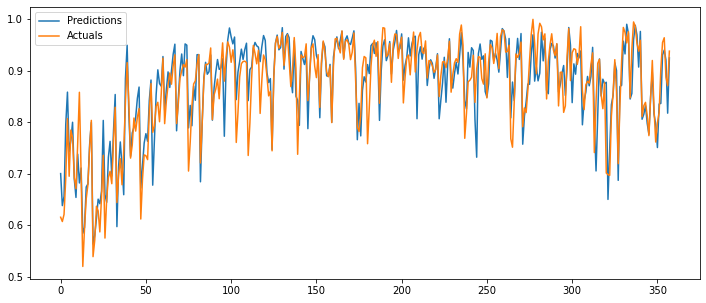

In [167]:
'''
Predicting and plotting the predictions
'''

predictions = model.predict(X_test).flatten()
df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y_test})
mp.figure(figsize=(12,5))
df.Predictions.plot(legend=True)
df.Actuals.plot(legend=True)
mp.show()

In [184]:
'''
Final dataset containing the predicted and actual values
'''

df

Predictions   Actuals
0       0.700055  0.615298
1       0.637851  0.606970
2       0.655913  0.620850
3       0.795380  0.690643
4       0.858258  0.806834
..           ...       ...
353     0.930438  0.954744
354     0.939896  0.963865
355     0.920612  0.887343
356     0.817399  0.870850
357     0.924694  0.937880

[358 rows x 2 columns]

# MODEL EVALUATION

In [179]:
'''
Model evaluation using MSE,RMSE,MAE and MAPE
'''

mse_LSTM = mean_squared_error(df.Actuals,df.Predictions)
mae_LSTM = mean_absolute_error(df.Actuals,df.Predictions)
rmse_LSTM = np.sqrt(mse_LSTM)
mape_LSTM = np.mean(np.abs(df.Actuals - df.Predictions)/(df.Actuals))*100

In [180]:
mse_LSTM

0.001784095244751345

In [181]:
rmse_LSTM

0.04223855164125949

In [182]:
mae_LSTM

0.029993405197771852

In [183]:
mape_LSTM

3.6044792092884483